# **Import Library**

In [229]:
# data wrangling
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
# data visualization
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

# **Load Dataset**

In [230]:
raw_df = pd.read_excel('D:\\NIDS-2023\\mawa\\data-mhs.xlsx')
raw_df.head(5)

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus
0,4112317035,ALFIN WIDYATMOKO,Statistika Terapan dan Komputasi,D3,2017,Dr. Iqbal Kharisudin M.Sc.,2022-07-11,NaN,LULUS,2022-08-19
1,4112318001,DHAMA SEKAR OKTAFANI,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2022-07-08,2023-07-21 08:10:00,LULUS,2023-07-21
2,4112318007,RANI WIDYANINGRUM,Statistika Terapan dan Komputasi,D3,2018,Prof. Dr. rer.nat. YL Sukestiyarno M.S.,2022-08-15,2023-08-10 08:00:00,LULUS,2023-08-10
3,4112318009,ENDAH SRI WAHYUNI,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2023-02-07,2023-08-15 10:00:00,LULUS,2023-08-15
4,4112318015,BERTI SUHARYANI,Statistika Terapan dan Komputasi,D3,2018,Dr. Scolastika Mariani M.Si.,2023-02-17,2023-07-21 10:00:00,LULUS,2023-08-16


In [231]:
raw_df.shape

(2432, 10)

In [232]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   nim                        2432 non-null   int64         
 1   nama                       2432 non-null   object        
 2   nama_prodi                 2432 non-null   object        
 3   jenjang                    2432 non-null   object        
 4   angkatan                   2432 non-null   int64         
 5   nama_pembimbing            2432 non-null   object        
 6   tanggal_sk_pembimbing      2432 non-null   datetime64[ns]
 7   tanggal_pelaksanaan_ujian  1868 non-null   object        
 8   status_lulus               2432 non-null   object        
 9   tgl_lulus                  1793 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 190.1+ KB


In [233]:
# angkatan included in dataset
angkatan = raw_df['angkatan'].value_counts().rename_axis('Angkatan').reset_index(name='Jumlah')
angkatan

,Angkatan,Jumlah
0,2019,845
1,2018,842
2,2017,745


In [234]:
# pembimbing included in dataset
pembimbing = raw_df['nama_pembimbing'].value_counts().rename_axis('Pembimbing').reset_index(name='Jumlah')
pembimbing

,Pembimbing,Jumlah
0,Dr. Drs. M. Aryono Adhi M.Si.,36
1,"Aji Purwinarko S.Si., M.Cs.",34
2,"Zaenal Abidin S.Si., M.Cs., Ph.D.",32
3,"Endang Sugiharti S.Si., M.Kom.",31
4,Dr. Siti Alimah M.Pd.,30
...,...,...
159,Dr. Nur Karomah Dwidayati M. Si.,1
160,"Muhammad Kharis S.Si., M.Sc.",1
161,"Teguh Darsono M.Si., Ph.D.",1
162,Prof. Dr. Kasmadi Imam Supardi M. S.,1


In [235]:
df = raw_df.copy()
df = df.loc[raw_df['status_lulus'] == "LULUS"]

In [236]:
df['tanggal_pelaksanaan_ujian'] = pd.to_datetime(df['tanggal_pelaksanaan_ujian'], format='%Y-%m-%d')

In [237]:
# check NaT in 'tanggal_pelaksanaan_ujian' column
df[df['tanggal_pelaksanaan_ujian'].isnull()]
# delete row contain NaT
df = df.dropna(subset=['tanggal_pelaksanaan_ujian'])

In [238]:
df['waktu_pelaksanaan_ujian'] = df['tanggal_pelaksanaan_ujian'].dt.time
df

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus,waktu_pelaksanaan_ujian
1,4112318001,DHAMA SEKAR OKTAFANI,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2022-07-08,2023-07-21 08:10:00,LULUS,2023-07-21,08:10:00
2,4112318007,RANI WIDYANINGRUM,Statistika Terapan dan Komputasi,D3,2018,Prof. Dr. rer.nat. YL Sukestiyarno M.S.,2022-08-15,2023-08-10 08:00:00,LULUS,2023-08-10,08:00:00
3,4112318009,ENDAH SRI WAHYUNI,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2023-02-07,2023-08-15 10:00:00,LULUS,2023-08-15,10:00:00
4,4112318015,BERTI SUHARYANI,Statistika Terapan dan Komputasi,D3,2018,Dr. Scolastika Mariani M.Si.,2023-02-17,2023-07-21 10:00:00,LULUS,2023-08-16,10:00:00
5,4112318016,MUHAMMAD IRSYADUL AZIZ,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2022-11-04,2023-08-16 13:00:00,LULUS,2023-08-16,13:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2422,4612419036,INDRA BAYU SETIYO SAPUTRO,Sistem Informasi,S1,2019,"Devi Ajeng Efrilianda S.Kom., M.Kom.",2022-11-22,2023-07-14 13:00:00,LULUS,2023-08-04,13:00:00
2424,4612419038,ALFAT MUTORIQ,Sistem Informasi,S1,2019,"Aji Purwinarko S.Si., M.Cs.",2023-01-24,2023-05-29 09:00:00,LULUS,2023-07-06,09:00:00
2425,4612419040,DIAH AYU APRILIANI,Sistem Informasi,S1,2019,"Aji Purwinarko S.Si., M.Cs.",2022-11-22,2023-10-03 09:00:00,LULUS,2023-10-24,09:00:00
2426,4612419041,ANNISA RACHMA WIJAYANTI,Sistem Informasi,S1,2019,"Zaenal Abidin S.Si., M.Cs., Ph.D.",2022-08-24,2023-07-05 13:00:00,LULUS,2023-07-17,13:00:00


In [239]:
df['tanggal_pelaksanaan_ujian'] = df['tanggal_pelaksanaan_ujian'].dt.date

In [240]:
df['lulus_daycount'] = np.where(df['tgl_lulus'] == df['tanggal_pelaksanaan_ujian'], 'sameday', 'not sameday')

In [241]:
df['tanggal_pelaksanaan_ujian'] = pd.to_datetime(df['tanggal_pelaksanaan_ujian'], format='%Y-%m-%d')
df['days'] = np.where(df['lulus_daycount'] == 'sameday', 0, (df['tgl_lulus'] - df['tanggal_pelaksanaan_ujian']).dt.days)
df.head(5)

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus,waktu_pelaksanaan_ujian,lulus_daycount,days
1,4112318001,DHAMA SEKAR OKTAFANI,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2022-07-08,2023-07-21,LULUS,2023-07-21,08:10:00,sameday,0
2,4112318007,RANI WIDYANINGRUM,Statistika Terapan dan Komputasi,D3,2018,Prof. Dr. rer.nat. YL Sukestiyarno M.S.,2022-08-15,2023-08-10,LULUS,2023-08-10,08:00:00,sameday,0
3,4112318009,ENDAH SRI WAHYUNI,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2023-02-07,2023-08-15,LULUS,2023-08-15,10:00:00,sameday,0
4,4112318015,BERTI SUHARYANI,Statistika Terapan dan Komputasi,D3,2018,Dr. Scolastika Mariani M.Si.,2023-02-17,2023-07-21,LULUS,2023-08-16,10:00:00,not sameday,26
5,4112318016,MUHAMMAD IRSYADUL AZIZ,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2022-11-04,2023-08-16,LULUS,2023-08-16,13:00:00,sameday,0


In [244]:
# df['tanggal_pelaksanaan_ujian'] = pd.to_datetime(df['tanggal_pelaksanaan_ujian'], format='%Y-%m-%d')
df['bimbingan-lulus'] = (df['tgl_lulus'] - df['tanggal_sk_pembimbing']).dt.days
df.head(5)

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus,waktu_pelaksanaan_ujian,lulus_daycount,days,bimbingan-lulus
1,4112318001,DHAMA SEKAR OKTAFANI,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2022-07-08,2023-07-21,LULUS,2023-07-21,08:10:00,sameday,0,378
2,4112318007,RANI WIDYANINGRUM,Statistika Terapan dan Komputasi,D3,2018,Prof. Dr. rer.nat. YL Sukestiyarno M.S.,2022-08-15,2023-08-10,LULUS,2023-08-10,08:00:00,sameday,0,360
3,4112318009,ENDAH SRI WAHYUNI,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2023-02-07,2023-08-15,LULUS,2023-08-15,10:00:00,sameday,0,189
4,4112318015,BERTI SUHARYANI,Statistika Terapan dan Komputasi,D3,2018,Dr. Scolastika Mariani M.Si.,2023-02-17,2023-07-21,LULUS,2023-08-16,10:00:00,not sameday,26,180
5,4112318016,MUHAMMAD IRSYADUL AZIZ,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2022-11-04,2023-08-16,LULUS,2023-08-16,13:00:00,sameday,0,285


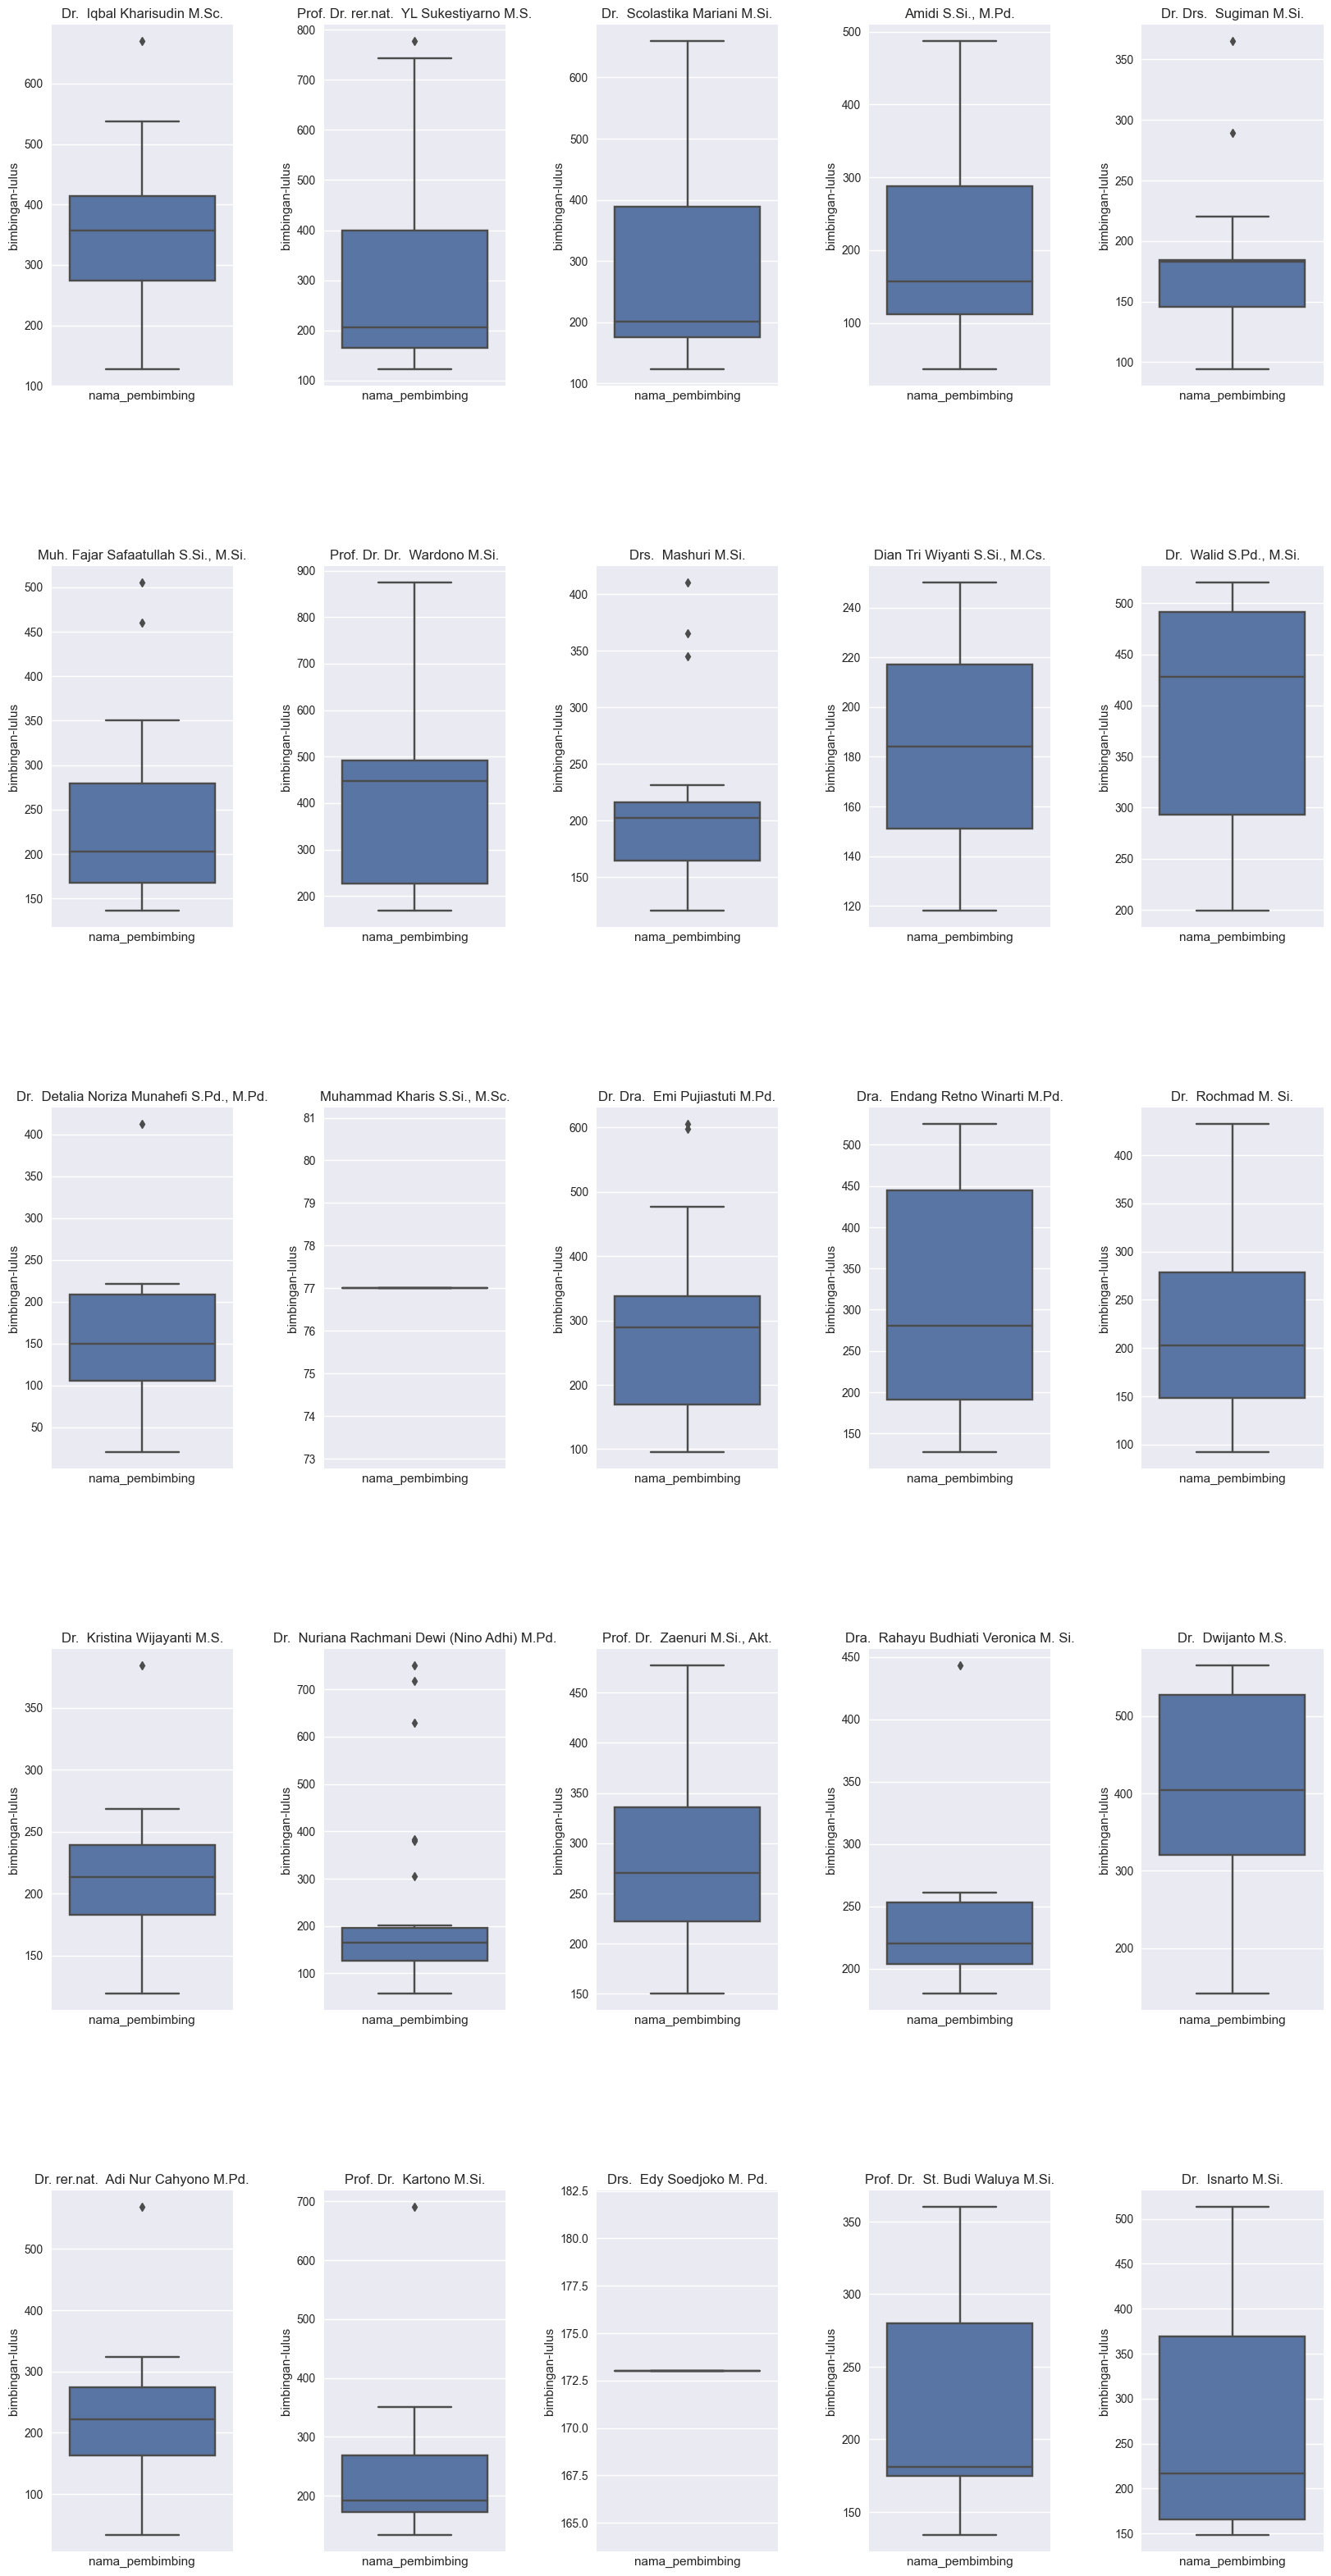

In [245]:
import math
import seaborn as sns

num_plots = 25
num_cols = 5
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plot_index = 0
for i in range(num_rows):
    for j in range(num_cols):
        if plot_index < len(df['nama_pembimbing'].unique()):
            supervisor = df['nama_pembimbing'].unique()[plot_index]
            sns.boxplot(x='nama_pembimbing', y='bimbingan-lulus', data=df[df['nama_pembimbing'] == supervisor], ax=axes[i, j])
            axes[i, j].set_title(supervisor)
            axes[i, j].set_xticks([])  # Menyembunyikan label pada sumbu x
            # axes[i, j].set_yticks([])  # Menyembunyikan label pada sumbu y
            plot_index += 1
        else:
            axes[i, j].axis('off')

plt.show()

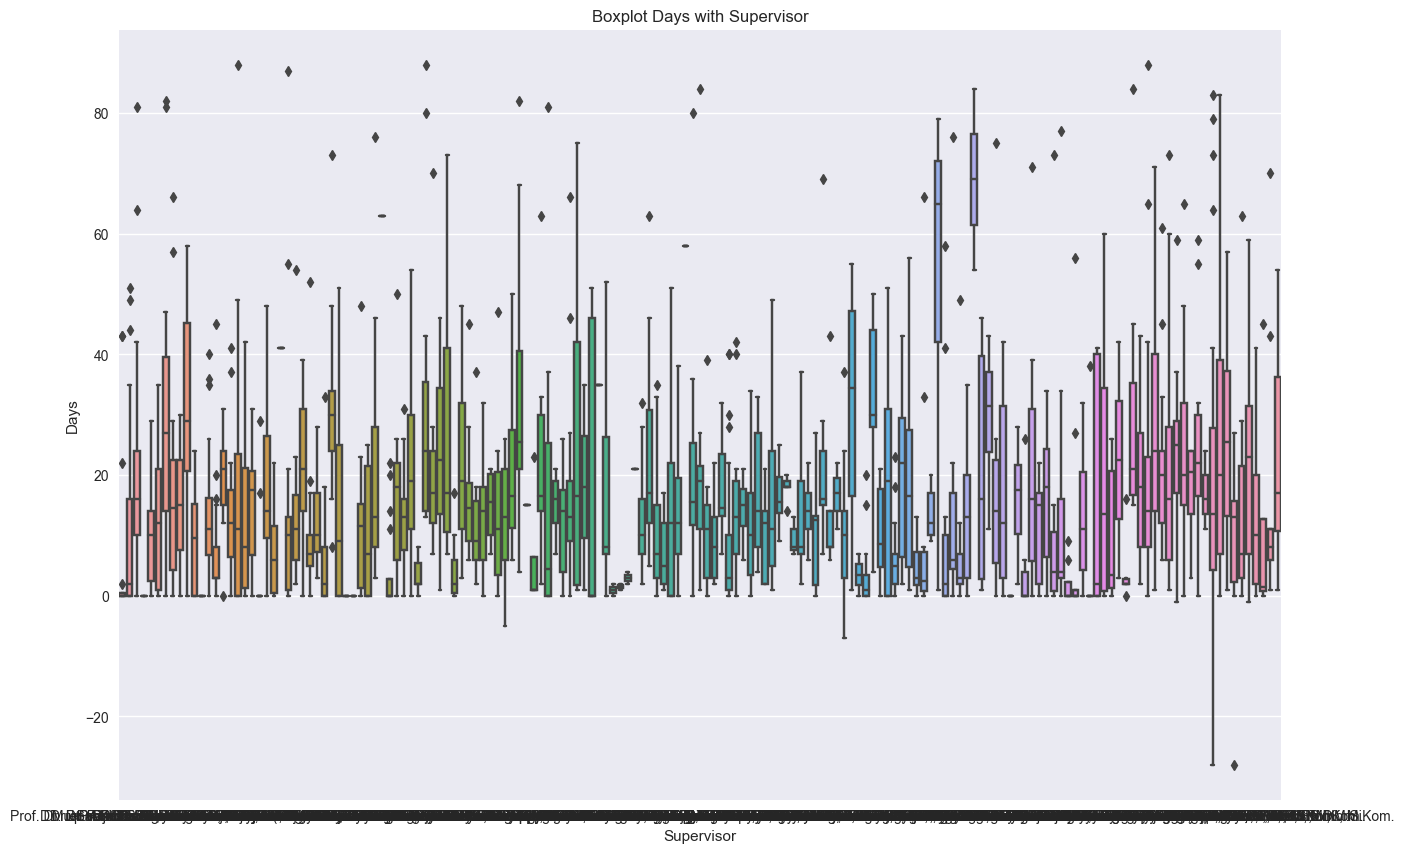

In [200]:
# box plot days dengan nama_pembimbing
plt.figure(figsize=(15, 10))
sn.boxplot(x='nama_pembimbing', y='days', data=df)
plt.title('Boxplot Days with Supervisor')
plt.xlabel('Supervisor')
plt.ylabel('Days')
plt.show()

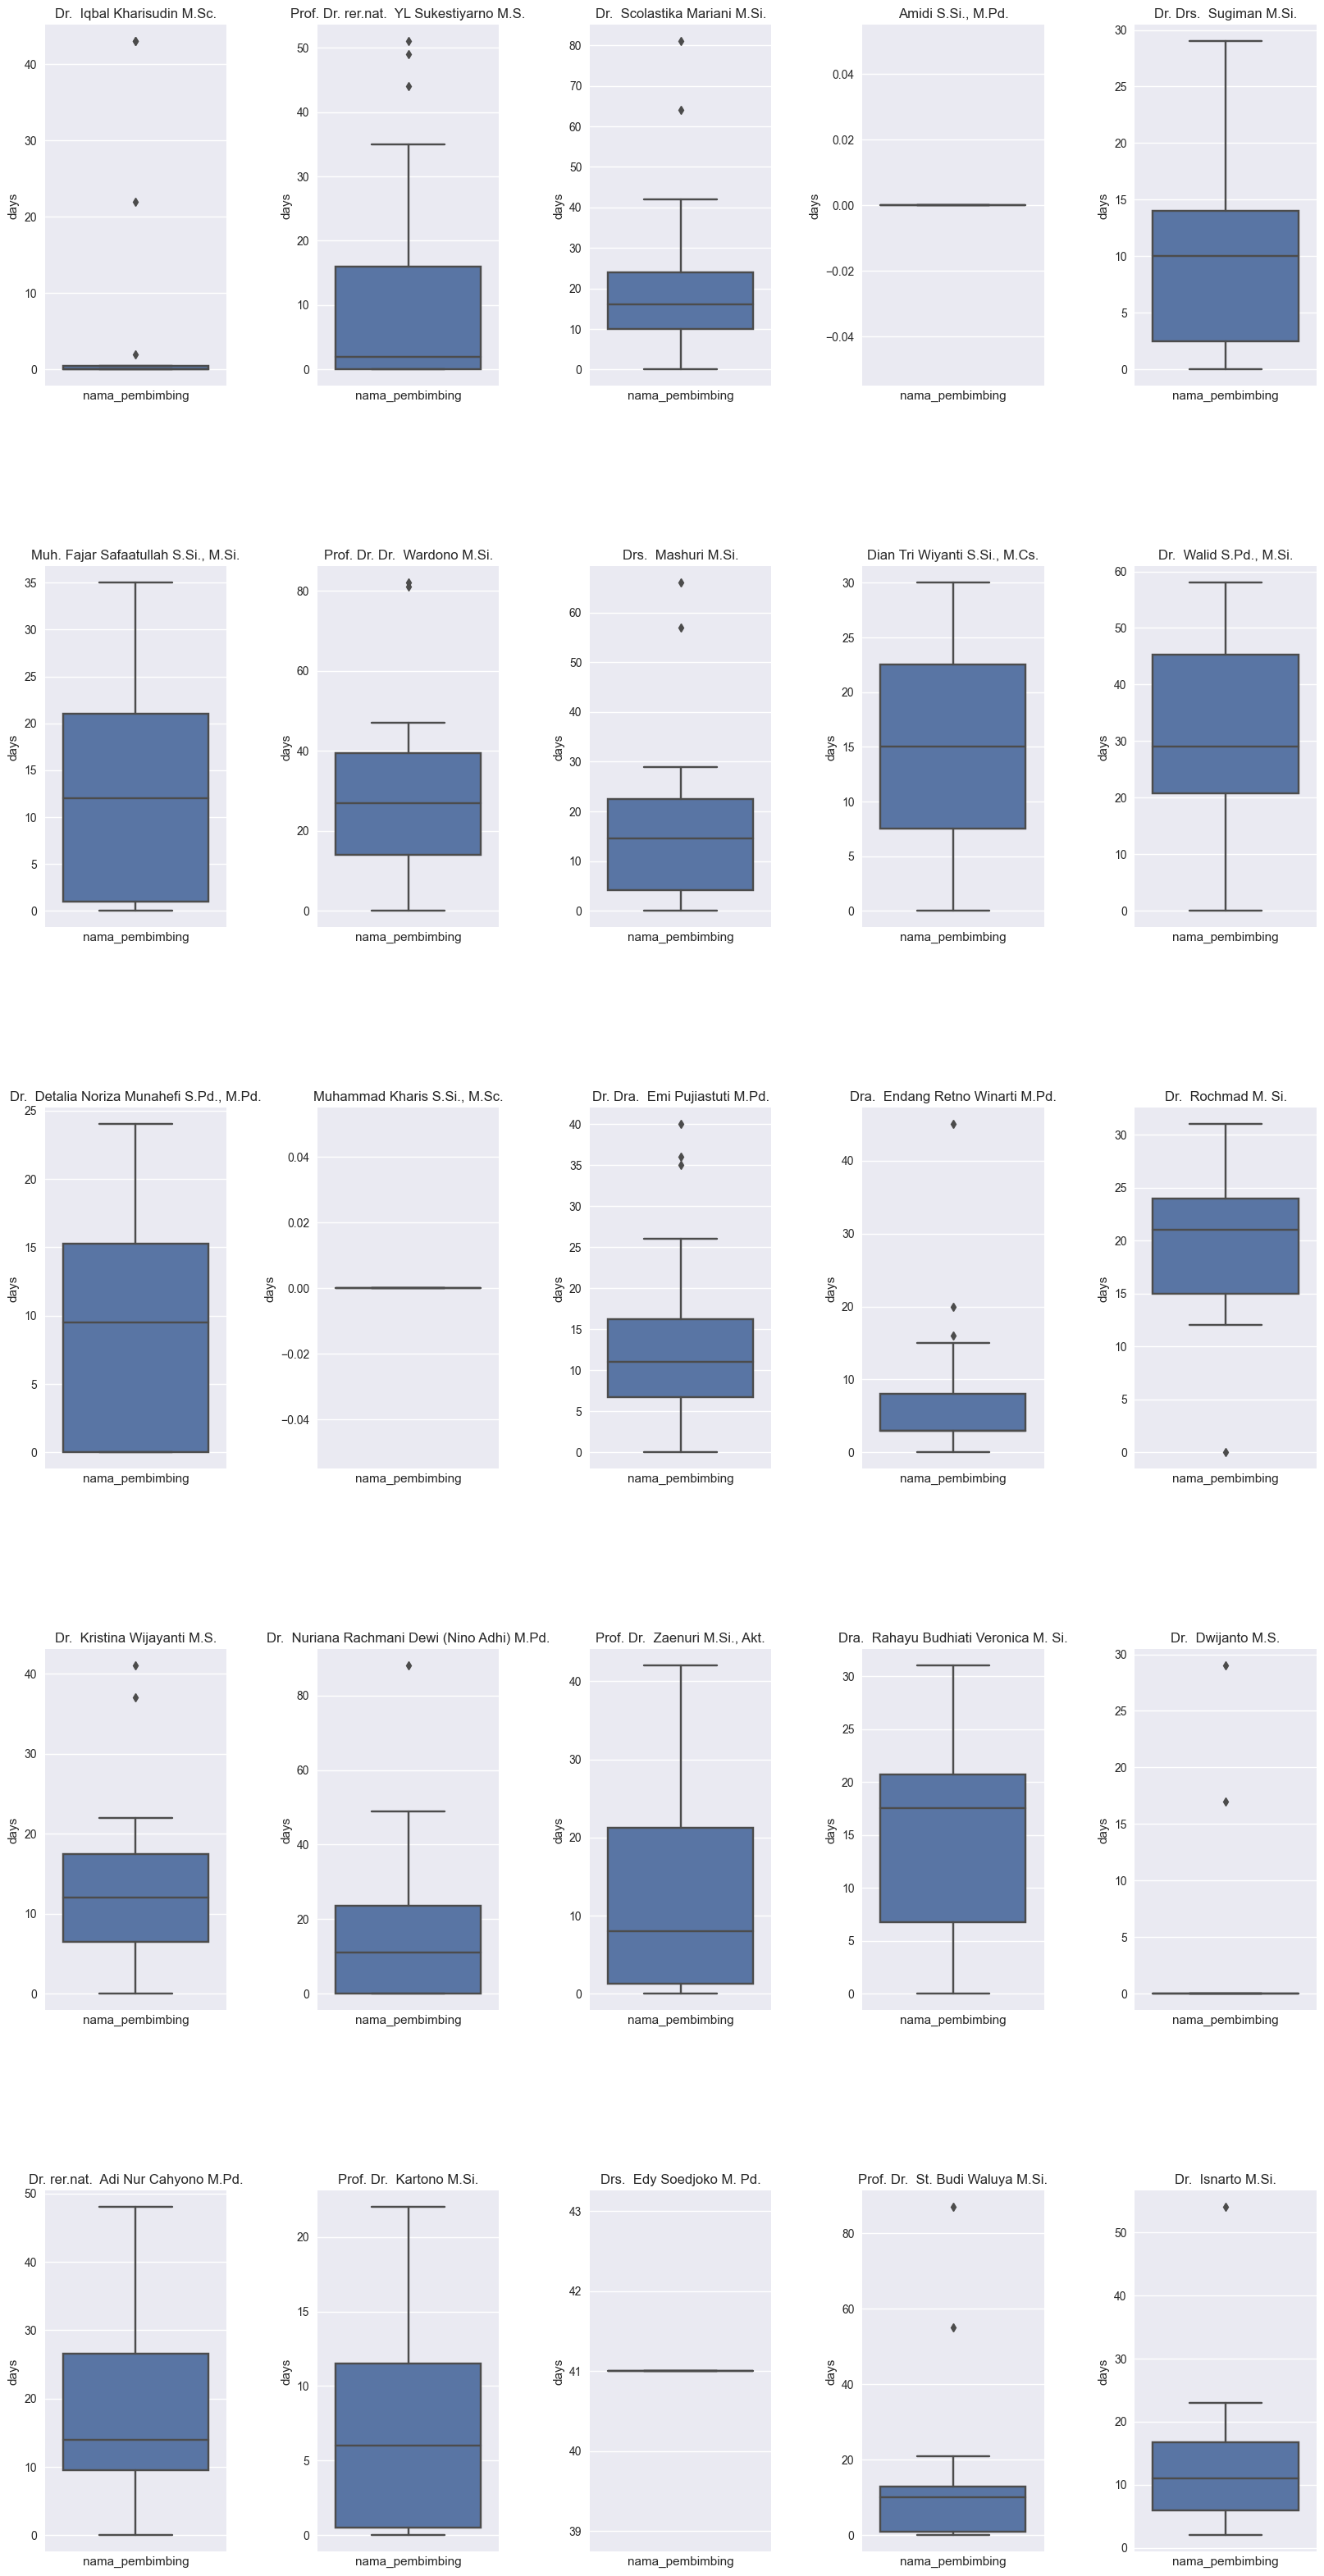

In [215]:
import math
import seaborn as sns

num_plots = 25
num_cols = 5
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plot_index = 0
for i in range(num_rows):
    for j in range(num_cols):
        if plot_index < len(df['nama_pembimbing'].unique()):
            supervisor = df['nama_pembimbing'].unique()[plot_index]
            sns.boxplot(x='nama_pembimbing', y='days', data=df[df['nama_pembimbing'] == supervisor], ax=axes[i, j])
            axes[i, j].set_title(supervisor)
            axes[i, j].set_xticks([])  # Menyembunyikan label pada sumbu x
            # axes[i, j].set_yticks([])  # Menyembunyikan label pada sumbu y
            plot_index += 1
        else:
            axes[i, j].axis('off')

plt.show()

# **Tahun 2017**

## **Prepare Data**

In [106]:
angkatan17 = raw_df.loc[raw_df['angkatan'] == 2017]
angkatan17

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus
0,4112317035,ALFIN WIDYATMOKO,Statistika Terapan dan Komputasi,D3,2017,Dr. Iqbal Kharisudin M.Sc.,2022-07-11,NaN,LULUS,2022-08-19
31,4101417001,Uun Roamah,Pendidikan Matematika,S1,2017,"Muh. Fajar Safaatullah S.Si., M.Si.",2021-03-29,2022-08-01 00:00:00,LULUS,2022-08-16
32,4101417002,Rina Rahmawati,Pendidikan Matematika,S1,2017,Dr. Dra. Emi Pujiastuti M.Pd.,2021-06-08,2023-01-16 00:00:00,LULUS,2023-01-27
33,4101417003,Risma Andini,Pendidikan Matematika,S1,2017,Dra. Endang Retno Winarti M.Pd.,2021-02-15,2022-07-05 00:00:00,LULUS,2022-07-25
34,4101417004,Galuh Ayu,Pendidikan Matematika,S1,2017,Dr. Rochmad M. Si.,2020-10-01,2021-03-05 00:00:00,LULUS,2021-03-05
...,...,...,...,...,...,...,...,...,...,...
2238,4611417077,YAYAN DWI KRISDIANTORO,Teknik Informatika,S1,2017,"Budi Prasetiyo S.Si., M.Kom.",2022-04-21,NaN,BELUM LULUS,NaT
2239,4611417078,QOMARIAH NAJMI,Teknik Informatika,S1,2017,"Anggyi Trisnawan Putra S.Si., M.Si.",2021-08-03,2021-11-19 00:00:00,LULUS,2021-11-26
2240,4611417079,ROFIQUL ANAM,Teknik Informatika,S1,2017,"Dr. Alamsyah S.Si., M.Kom.",2020-11-09,NaN,BELUM LULUS,NaT
2241,4611417080,MUHAMMAD GHIFARI KHANIF ALHUSNA,Teknik Informatika,S1,2017,"Aji Purwinarko S.Si., M.Cs.",2022-10-25,2023-05-31 09:00:00,LULUS,2023-06-19


In [107]:
angkatan17.groupby(['nama_prodi','status_lulus']).size().reset_index(name='jumlah')

,nama_prodi,status_lulus,jumlah
0,Biologi,BELUM LULUS,13
1,Biologi,LULUS,50
2,Fisika,BELUM LULUS,2
3,Fisika,LULUS,27
4,Kimia,BELUM LULUS,1
5,Kimia,LULUS,58
6,Matematika,BELUM LULUS,5
7,Matematika,LULUS,31
8,Pendidikan Biologi,BELUM LULUS,24
9,Pendidikan Biologi,LULUS,70


In [108]:
fig = px.bar(angkatan17.groupby(['nama_prodi','status_lulus']).size().reset_index(name='jumlah'), 
             x='nama_prodi', 
             y='jumlah', 
             color='status_lulus', 
             barmode='group',
             title='jumlah Kelulusan Prodi',
             labels={'jumlah': 'jumlah Mahasiswa', 'Prodi': 'nama_prodi'},
             text='jumlah'
            )

fig.update_layout(yaxis=dict(title='jumlah Mahasiswa'))  # Label sumbu Y

fig.show()

Note:

Prodi Statistika Terapan dan Komputasi pada dataset hanya ada 1 mahasiswa, oleh karena itu akan kita exclude.

In [109]:
# drop row in column 'nama_prodi' contain 'Statistika Terapan dan Komputasi"
angkatan17 = angkatan17[angkatan17.nama_prodi != 'Statistika Terapan dan Komputasi']
angkatan17

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus
31,4101417001,Uun Roamah,Pendidikan Matematika,S1,2017,"Muh. Fajar Safaatullah S.Si., M.Si.",2021-03-29,2022-08-01 00:00:00,LULUS,2022-08-16
32,4101417002,Rina Rahmawati,Pendidikan Matematika,S1,2017,Dr. Dra. Emi Pujiastuti M.Pd.,2021-06-08,2023-01-16 00:00:00,LULUS,2023-01-27
33,4101417003,Risma Andini,Pendidikan Matematika,S1,2017,Dra. Endang Retno Winarti M.Pd.,2021-02-15,2022-07-05 00:00:00,LULUS,2022-07-25
34,4101417004,Galuh Ayu,Pendidikan Matematika,S1,2017,Dr. Rochmad M. Si.,2020-10-01,2021-03-05 00:00:00,LULUS,2021-03-05
35,4101417005,Oktriviani Dewi,Pendidikan Matematika,S1,2017,Dr. Kristina Wijayanti M.S.,2021-03-26,2021-10-14 00:00:00,LULUS,2021-10-29
...,...,...,...,...,...,...,...,...,...,...
2238,4611417077,YAYAN DWI KRISDIANTORO,Teknik Informatika,S1,2017,"Budi Prasetiyo S.Si., M.Kom.",2022-04-21,NaN,BELUM LULUS,NaT
2239,4611417078,QOMARIAH NAJMI,Teknik Informatika,S1,2017,"Anggyi Trisnawan Putra S.Si., M.Si.",2021-08-03,2021-11-19 00:00:00,LULUS,2021-11-26
2240,4611417079,ROFIQUL ANAM,Teknik Informatika,S1,2017,"Dr. Alamsyah S.Si., M.Kom.",2020-11-09,NaN,BELUM LULUS,NaT
2241,4611417080,MUHAMMAD GHIFARI KHANIF ALHUSNA,Teknik Informatika,S1,2017,"Aji Purwinarko S.Si., M.Cs.",2022-10-25,2023-05-31 09:00:00,LULUS,2023-06-19


In [110]:
# Menemukan baris dengan nilai null dan status_lulus bukan "BELUM LULUS"
angkatan17[angkatan17.isnull().any(axis=1) & (angkatan17['status_lulus'] != "BELUM LULUS")]

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus


## **Persentase Kelulusan**

In [111]:
grouped_data = angkatan17.groupby(['nama_prodi', 'jenjang', 'angkatan', 'status_lulus']).size().reset_index(name='jumlah')
pivot_table_17 = grouped_data.pivot(index=['nama_prodi', 'jenjang', 'angkatan'], columns='status_lulus', values='jumlah').reset_index()
pivot_table_17 = pivot_table_17.rename_axis(None, axis=1)
pivot_table_17 = pivot_table_17.rename(columns={'Sudah Lulus': 'sudah_lulus', 'Belum Lulus': 'belum_lulus'})
pivot_table_17

,nama_prodi,jenjang,angkatan,BELUM LULUS,LULUS
0,Biologi,S1,2017,13,50
1,Fisika,S1,2017,2,27
2,Kimia,S1,2017,1,58
3,Matematika,S1,2017,5,31
4,Pendidikan Biologi,S1,2017,24,70
5,Pendidikan Fisika,S1,2017,7,77
6,Pendidikan Ilmu Pengetahuan Alam,S1,2017,9,65
7,Pendidikan Kimia,S1,2017,5,66
8,Pendidikan Matematika,S1,2017,36,134
9,Teknik Informatika,S1,2017,17,47


In [112]:
# make new column called 'persentase' which value is lulus/lulus+belum lulus * 100
pivot_table_17['persentase'] = pivot_table_17['LULUS'] / (pivot_table_17['LULUS'] + pivot_table_17['BELUM LULUS']) * 100
pivot_table_17['persentase'] = pivot_table_17['persentase'].round(2)

In [113]:
pivot_table_17

,nama_prodi,jenjang,angkatan,BELUM LULUS,LULUS,persentase
0,Biologi,S1,2017,13,50,79.37
1,Fisika,S1,2017,2,27,93.10
2,Kimia,S1,2017,1,58,98.31
3,Matematika,S1,2017,5,31,86.11
4,Pendidikan Biologi,S1,2017,24,70,74.47
5,Pendidikan Fisika,S1,2017,7,77,91.67
6,Pendidikan Ilmu Pengetahuan Alam,S1,2017,9,65,87.84
7,Pendidikan Kimia,S1,2017,5,66,92.96
8,Pendidikan Matematika,S1,2017,36,134,78.82
9,Teknik Informatika,S1,2017,17,47,73.44


In [114]:
# bar chart using px based on 'persentase'
fig = px.bar(pivot_table_17, 
             x='nama_prodi', 
             y='persentase', 
             color='jenjang', 
             barmode='group',
             title='Persentase Kelulusan Prodi',
             labels={'persentase': 'Persentase Kelulusan', 'nama_prodi': 'Prodi'},
             text='persentase'
            )
fig.show()

# **Tahun 2018**

In [115]:
angkatan18 = raw_df.loc[raw_df['angkatan'] == 2018]
angkatan18

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus
1,4112318001,DHAMA SEKAR OKTAFANI,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2022-07-08,2023-07-21 08:10:00,LULUS,2023-07-21
2,4112318007,RANI WIDYANINGRUM,Statistika Terapan dan Komputasi,D3,2018,Prof. Dr. rer.nat. YL Sukestiyarno M.S.,2022-08-15,2023-08-10 08:00:00,LULUS,2023-08-10
3,4112318009,ENDAH SRI WAHYUNI,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2023-02-07,2023-08-15 10:00:00,LULUS,2023-08-15
4,4112318015,BERTI SUHARYANI,Statistika Terapan dan Komputasi,D3,2018,Dr. Scolastika Mariani M.Si.,2023-02-17,2023-07-21 10:00:00,LULUS,2023-08-16
5,4112318016,MUHAMMAD IRSYADUL AZIZ,Statistika Terapan dan Komputasi,D3,2018,Dr. Iqbal Kharisudin M.Sc.,2022-11-04,2023-08-16 13:00:00,LULUS,2023-08-16
...,...,...,...,...,...,...,...,...,...,...
2391,4612418034,CHYNTIA EKA PUTRI,Sistem Informasi,S1,2018,"Zaenal Abidin S.Si., M.Cs., Ph.D.",2022-10-25,NaN,BELUM LULUS,NaT
2392,4612418035,MUHAMAD IQBAL NUUR AR RASYID,Sistem Informasi,S1,2018,"Endang Sugiharti S.Si., M.Kom.",2023-01-20,2023-03-16 10:00:00,LULUS,2023-06-07
2393,4612418037,MUHAMMAD LINTANG ANUGRAH HANA PUTRA,Sistem Informasi,S1,2018,"Zaenal Abidin S.Si., M.Cs., Ph.D.",2022-06-21,NaN,BELUM LULUS,NaT
2394,4612418039,FREDY KUSUMA NELLY,Sistem Informasi,S1,2018,"Budi Prasetiyo S.Si., M.Kom.",2022-09-27,2023-03-09 10:00:00,LULUS,2023-03-16


In [116]:
angkatan18.groupby(['nama_prodi','status_lulus']).size().reset_index(name='jumlah')

,nama_prodi,status_lulus,jumlah
0,Biologi,BELUM LULUS,17
1,Biologi,LULUS,52
2,Fisika,BELUM LULUS,9
3,Fisika,LULUS,38
4,Kimia,BELUM LULUS,8
5,Kimia,LULUS,50
6,Matematika,BELUM LULUS,11
7,Matematika,LULUS,24
8,Pendidikan Biologi,BELUM LULUS,21
9,Pendidikan Biologi,LULUS,70


In [117]:
fig = px.bar(angkatan18.groupby(['nama_prodi','status_lulus']).size().reset_index(name='jumlah'), 
             x='nama_prodi', 
             y='jumlah', 
             color='status_lulus', 
             barmode='group',
             title='jumlah Kelulusan Prodi',
             labels={'jumlah': 'jumlah Mahasiswa', 'Prodi': 'nama_prodi'},
             text='jumlah'
            )

fig.update_layout(yaxis=dict(title='jumlah Mahasiswa'))  # Label sumbu Y

fig.show()

In [118]:
# Menemukan baris dengan nilai null dan status_lulus bukan "BELUM LULUS"
angkatan18[angkatan18.isnull().any(axis=1) & (angkatan18['status_lulus'] != "BELUM LULUS")]

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus


Catatan:

Bimbingan aktif di tahun 2023

In [119]:
grouped_data = angkatan18.groupby(['nama_prodi', 'jenjang', 'angkatan', 'status_lulus']).size().reset_index(name='jumlah')
pivot_table_18 = grouped_data.pivot(index=['nama_prodi', 'jenjang', 'angkatan'], columns='status_lulus', values='jumlah').reset_index()
pivot_table_18 = pivot_table_18.rename_axis(None, axis=1)
pivot_table_18 = pivot_table_18.rename(columns={'Sudah Lulus': 'sudah_lulus', 'Belum Lulus': 'belum_lulus'})
pivot_table_18

,nama_prodi,jenjang,angkatan,BELUM LULUS,LULUS
0,Biologi,S1,2018,17,52
1,Fisika,S1,2018,9,38
2,Kimia,S1,2018,8,50
3,Matematika,S1,2018,11,24
4,Pendidikan Biologi,S1,2018,21,70
5,Pendidikan Fisika,S1,2018,22,60
6,Pendidikan Ilmu Pengetahuan Alam,S1,2018,12,60
7,Pendidikan Kimia,S1,2018,13,77
8,Pendidikan Matematika,S1,2018,51,147
9,Sistem Informasi,S1,2018,9,22


In [120]:
# make new column called 'persentase' which value is lulus/lulus+belum lulus * 100
pivot_table_18['persentase'] = pivot_table_18['LULUS'] / (pivot_table_18['LULUS'] + pivot_table_18['BELUM LULUS']) * 100
pivot_table_18['persentase'] = pivot_table_18['persentase'].round(2)

In [121]:
pivot_table_18

,nama_prodi,jenjang,angkatan,BELUM LULUS,LULUS,persentase
0,Biologi,S1,2018,17,52,75.36
1,Fisika,S1,2018,9,38,80.85
2,Kimia,S1,2018,8,50,86.21
3,Matematika,S1,2018,11,24,68.57
4,Pendidikan Biologi,S1,2018,21,70,76.92
5,Pendidikan Fisika,S1,2018,22,60,73.17
6,Pendidikan Ilmu Pengetahuan Alam,S1,2018,12,60,83.33
7,Pendidikan Kimia,S1,2018,13,77,85.56
8,Pendidikan Matematika,S1,2018,51,147,74.24
9,Sistem Informasi,S1,2018,9,22,70.97


In [122]:
# bar chart using px based on 'persentase'
fig = px.bar(pivot_table_18, 
             x='nama_prodi', 
             y='persentase', 
            #  color='jenjang', 
             barmode='group',
             title='Persentase Kelulusan Prodi',
             labels={'persentase': 'Persentase Kelulusan', 'nama_prodi': 'Prodi'},
             text='persentase'
            )
fig.show()

# **Tahun 2019**

In [123]:
angkatan19 = raw_df.loc[raw_df['angkatan'] == 2019]
angkatan19

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus
9,4112319001,PUJA AULIA ZUMUL LAILY,Statistika Terapan dan Komputasi,D3,2019,"Amidi S.Si., M.Pd.",2022-06-30,2022-11-10 00:00:00,LULUS,2022-11-10
10,4112319002,DHIDHIT BONDHAN PAMUNGKAS,Statistika Terapan dan Komputasi,D3,2019,Dr. Drs. Sugiman M.Si.,2022-06-30,2022-10-20 00:00:00,LULUS,2022-11-18
11,4112319003,LILIANA SHINTA DEWI,Statistika Terapan dan Komputasi,D3,2019,Dr. Iqbal Kharisudin M.Sc.,2022-06-30,2023-05-29 08:00:00,LULUS,2023-05-29
12,4112319006,ALFANDI YUSUF PRATAMA,Statistika Terapan dan Komputasi,D3,2019,"Dr. Putriaji Hendikawati S.Si., M.Pd., M.Sc.",2022-06-30,NaN,BELUM LULUS,NaT
13,4112319007,ARINDA CINTA LESTARI,Statistika Terapan dan Komputasi,D3,2019,Dr. Iqbal Kharisudin M.Sc.,2022-06-30,2023-08-07 08:00:00,LULUS,2023-08-07
...,...,...,...,...,...,...,...,...,...,...
2427,4612419042,BAGAS MAHARDIKA,Sistem Informasi,S1,2019,"Anggyi Trisnawan Putra S.Si., M.Si.",2023-02-03,NaN,BELUM LULUS,NaT
2428,4612419045,ASHARINNISA SALSABILA,Sistem Informasi,S1,2019,"Budi Prasetiyo S.Si., M.Kom.",2022-12-15,NaN,BELUM LULUS,NaT
2429,4612419046,ARIF SAIFUNNASRULLAH,Sistem Informasi,S1,2019,"Kholiq Budiman S.Pd., M.Kom.",2022-11-22,2023-02-01 00:00:00,LULUS,2023-02-03
2430,4612419047,AGUS BAYU PAMUNGKAS,Sistem Informasi,S1,2019,"Budi Prasetiyo S.Si., M.Kom.",2023-11-02,NaN,BELUM LULUS,NaT


In [124]:
angkatan19.groupby(['nama_prodi','status_lulus']).size().reset_index(name='jumlah')

,nama_prodi,status_lulus,jumlah
0,Biologi,BELUM LULUS,16
1,Biologi,LULUS,56
2,Fisika,BELUM LULUS,16
3,Fisika,LULUS,40
4,Ilmu Lingkungan,BELUM LULUS,21
5,Ilmu Lingkungan,LULUS,10
6,Kimia,BELUM LULUS,36
7,Kimia,LULUS,13
8,Matematika,BELUM LULUS,17
9,Matematika,LULUS,19


In [125]:
fig = px.bar(angkatan19.groupby(['nama_prodi','status_lulus']).size().reset_index(name='jumlah'), 
             x='nama_prodi', 
             y='jumlah', 
             color='status_lulus', 
             barmode='group',
             title='jumlah Kelulusan Prodi',
             labels={'jumlah': 'jumlah Mahasiswa', 'Prodi': 'nama_prodi'},
             text='jumlah'
            )

fig.update_layout(yaxis=dict(title='jumlah Mahasiswa'))  # Label sumbu Y

fig.show()

In [126]:
# Menemukan baris dengan nilai null dan status_lulus bukan "BELUM LULUS"
angkatan19[angkatan19.isnull().any(axis=1) & (angkatan19['status_lulus'] != "BELUM LULUS")]

,nim,nama,nama_prodi,jenjang,angkatan,nama_pembimbing,tanggal_sk_pembimbing,tanggal_pelaksanaan_ujian,status_lulus,tgl_lulus


In [127]:
grouped_data = angkatan19.groupby(['nama_prodi', 'jenjang', 'angkatan', 'status_lulus']).size().reset_index(name='jumlah')
pivot_table_19 = grouped_data.pivot(index=['nama_prodi', 'jenjang', 'angkatan'], columns='status_lulus', values='jumlah').reset_index()
pivot_table_19 = pivot_table_19.rename_axis(None, axis=1)
pivot_table_19 = pivot_table_19.rename(columns={'Sudah Lulus': 'sudah_lulus', 'Belum Lulus': 'belum_lulus'})
pivot_table_19

,nama_prodi,jenjang,angkatan,BELUM LULUS,LULUS
0,Biologi,S1,2019,16,56
1,Fisika,S1,2019,16,40
2,Ilmu Lingkungan,S1,2019,21,10
3,Kimia,S1,2019,36,13
4,Matematika,S1,2019,17,19
5,Pendidikan Biologi,S1,2019,53,43
6,Pendidikan Fisika,S1,2019,16,53
7,Pendidikan Ilmu Pengetahuan Alam,S1,2019,29,34
8,Pendidikan Kimia,S1,2019,20,67
9,Pendidikan Matematika,S1,2019,48,119


In [128]:
pivot_table_19['persentase'] = pivot_table_19['LULUS'] / (pivot_table_19['LULUS'] + pivot_table_19['BELUM LULUS']) * 100
pivot_table_19['persentase'] = pivot_table_19['persentase'].round(2)
pivot_table_19

,nama_prodi,jenjang,angkatan,BELUM LULUS,LULUS,persentase
0,Biologi,S1,2019,16,56,77.78
1,Fisika,S1,2019,16,40,71.43
2,Ilmu Lingkungan,S1,2019,21,10,32.26
3,Kimia,S1,2019,36,13,26.53
4,Matematika,S1,2019,17,19,52.78
5,Pendidikan Biologi,S1,2019,53,43,44.79
6,Pendidikan Fisika,S1,2019,16,53,76.81
7,Pendidikan Ilmu Pengetahuan Alam,S1,2019,29,34,53.97
8,Pendidikan Kimia,S1,2019,20,67,77.01
9,Pendidikan Matematika,S1,2019,48,119,71.26


In [227]:
# bar chart using px based on 'persentase'
fig = px.bar(pivot_table_19, 
             x='nama_prodi', 
             y='persentase', 
             barmode='group',
             title='Persentase Kelulusan Prodi',
             labels={'persentase': 'Persentase Kelulusan', 'nama_prodi': 'Prodi'},
             text='persentase',
             color="persentase", color_continuous_scale='blues'
            )

fig.show()

In [130]:
# concat pivot_table_17, pivot_table_18, pivot_table_19
pivot_table = pd.concat([pivot_table_17, pivot_table_18, pivot_table_19]).reset_index()
pivot_table

,index,nama_prodi,jenjang,angkatan,BELUM LULUS,LULUS,persentase
0,0,Biologi,S1,2017,13,50,79.37
1,1,Fisika,S1,2017,2,27,93.10
2,2,Kimia,S1,2017,1,58,98.31
3,3,Matematika,S1,2017,5,31,86.11
4,4,Pendidikan Biologi,S1,2017,24,70,74.47
5,5,Pendidikan Fisika,S1,2017,7,77,91.67
6,6,Pendidikan Ilmu Pengetahuan Alam,S1,2017,9,65,87.84
7,7,Pendidikan Kimia,S1,2017,5,66,92.96
8,8,Pendidikan Matematika,S1,2017,36,134,78.82
9,9,Teknik Informatika,S1,2017,17,47,73.44


In [150]:
# bar chart for angkatan and persentase if nama_prodi is same using px
bio = pivot_table.groupby('nama_prodi' == 'Biologi')
fig = px.bar(pivot_table, 
             x='angkatan', 
             y='persentase', 
             color='nama_prodi', 
             barmode='group',
             title='Persentase Kelulusan Prodi',
             labels={'persentase': 'Persentase Kelulusan', 'nama_prodi': 'Prodi'},
             text='persentase'
            )
fig.show()

In [169]:
# Get unique values in 'nama_prodi'
prodi_list = pivot_table['nama_prodi'].unique()

# Loop through each 'nama_prodi' and create a bar chart
for prodi in prodi_list:
    # Filter DataFrame for the current 'nama_prodi' and specific years
    bio = pivot_table[(pivot_table['nama_prodi'] == prodi) & (pivot_table['angkatan'].isin([2017, 2018, 2019]))]

    # Create bar chart
    fig = px.bar(bio,
                 x='angkatan',
                 y='persentase',
                 color='nama_prodi',
                 barmode='group',
                 title=f'Persentase Kelulusan {prodi}',
                 labels={'persentase': 'Persentase Kelulusan', 'angkatan': 'Angkatan'},
                 text='persentase'
                )

    # Explicitly set tick values on the y-axis
    fig.update_layout(
        xaxis=dict(
            tickvals=[2017, 2018, 2019],
            ticktext=['2017', '2018', '2019']
        )
    )

    fig.show()